Machine Learning 
Supervised learning:
  Models that can predict labels based on labeled training data 
     ##Classification: Models that predict labels as two or more discrete categories.
     ##Regression: Models that predict continuous labels
Unsupervised learning:
  Models that identify structure in unlabeled data
     ##Clustering: Models that detect and identify distinct groups in the data.
     ##Dimensionality reduction: Models that detect and identify lower-dimensional structure in higherdimensional data


##INTRODUCTION TO SCIKIT-LEARN
We will start by: 1) covering data representation in Scikit-Learn
                  2) covering the Estimator API
                  3) using these tools for exploring a set of images of handwritten digits.



In [4]:
#The best way to think about data within Scikit-Learn is in terms of tables of data.
#Data as table
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\margaretm\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\margaretm\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


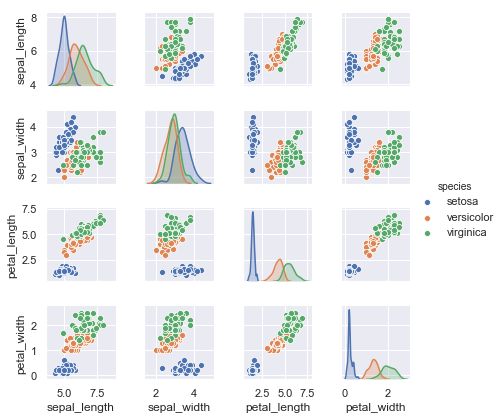

In [5]:
####to visualize
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);


In [7]:
######extract the feature matrix and  the target array
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


Consistency
    All objects share a common interface drawn from a limited set of methods,
    with consistent documentation.
Inspection
    All specified parameter values are exposed as public attributes.
    Limited object hierarchy Only algorithms are represented by
    Python classes; datasets are represented in standard formats
    (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and
    parameter names use standard Python strings.
Composition 
    Many machine learning tasks can be expressed as sequences of more
    fundamental algorithms, and Scikit-Learn makes use of this wherever possible.
Sensible defaults
    When models require user-specified parameters, the library defines an appropriate default value.

Steps in using Scikit-learn estimator
1. Choose a class of model by importing the appropriate estimator class from ScikitLearn.
2. Choose model hyperparameters by instantiating this class with desired values. 
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data: 
    • For supervised learning, often we predict labels for unknown data using the predict() method.
    • For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

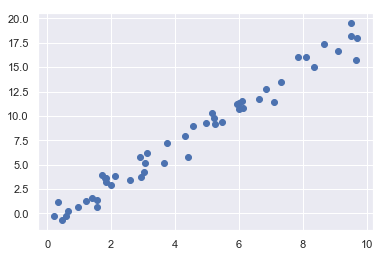

In [10]:
#Supervised learning example: Simple linear regression
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42) 
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [12]:
#Choose a class of model
from sklearn.linear_model import LinearRegression

# Choose model hyperparameters. 
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Depending on the model class we might need toansewr the following
• Would we like to fit for the offset (i.e., intercept)?
• Would we like the model to be normalized?
• Would we like to preprocess our features to add model flexibility?
• What degree of regularization would we like to use in our model?
• How many model components would we like to use?

In [16]:
#Arrange data into a features matrix and target vector. 
X = x[:, np.newaxis]
X.shape
###fit model
model.fit(X, y)

##model parameters learned
print(model.coef_)

print(model.intercept_)


[1.9776566]
-0.9033107255311164


In [17]:
#Predict labels for unknown data.
xfit = np.linspace(-1, 11)

Xfit = xfit[:, np.newaxis] 
yfit = model.predict(Xfit)

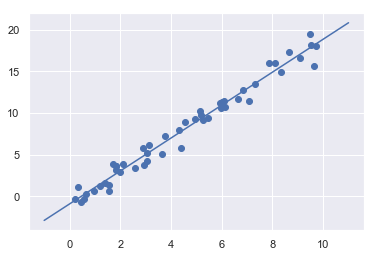

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit); 

In [23]:
##Supervised learning example: Iris classification
##Gaussian Naive bayes
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1) 

In [25]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data 
y_model = model.predict(Xtest)             # 4. predict on new data

####accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)


0.9736842105263158

In [26]:
######Unsupervised learning  Iris Dimensionality
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)      # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)   # 4. Transform the data to two dimensions

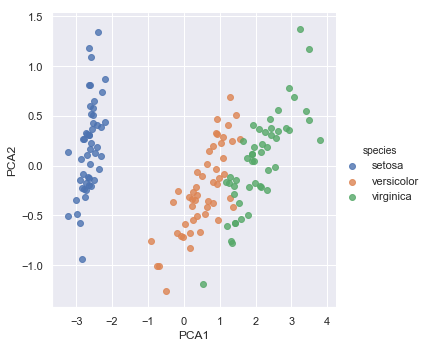

In [27]:
##plot results
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False); 

In [31]:
#!pip3 install GMM

  Stored in directory: C:\Users\margaretm\AppData\Local\pip\Cache\wheels\a1\c1\d4\7931a8f0e684c97cde85165009e96d1abed97c175fbcf10fec
Successfully built GMM


In [32]:
##Unsupervised learning: Iris clustering 
import GMM                      # 1. Choose the model class
model = GMM(n_components=3,covariance_type='full')   # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris)                                     # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                         # 4. Determine cluster labels

ModuleNotFoundError: No module named 'GMM'